#HW1_1 Train on actual tasks based on MNIST dataset



In [ ]:
%tensorflow_version 1.x 
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.version)


<module 'tensorflow._api.v1.version' from '/tensorflow-1.15.2/python3.6/tensorflow_core/_api/v1/version/__init__.py'>


In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [ ]:
# data preparation
data = input_data.read_data_sets('data/MNIST/', one_hot=True);
train_num = data.train.num_examples;
valid_num = data.validation.num_examples;
test_num = data.test.num_examples;
img_flatten = 784
img_size = 28
num_classes = 10
print("Training Dataset Size:",train_num)
print("Validation Dataset Size:",valid_num)
print("Testing Dataset Size:",test_num)


Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Training Dataset Size: 55000
Validation Dataset Size: 5000
Testing Dataset Size: 10000


Iteration:      1, Training Loss: 2.30763, Training Accuracy:  12.5%
Iteration:     21, Training Loss: 0.418513, Training Accuracy:  90.6%
Iteration:     41, Training Loss: 0.195262, Training Accuracy:  93.8%
Iteration:     61, Training Loss: 0.159187, Training Accuracy:  92.2%
Iteration:     81, Training Loss: 0.0857157, Training Accuracy:  96.9%
Iteration:    101, Training Loss: 0.196809, Training Accuracy:  92.2%
Iteration:    121, Training Loss: 0.0201758, Training Accuracy: 100.0%
Iteration:    141, Training Loss: 0.0645313, Training Accuracy:  98.4%
Iteration:    161, Training Loss: 0.157309, Training Accuracy:  93.8%
Iteration:    181, Training Loss: 0.031863, Training Accuracy:  98.4%


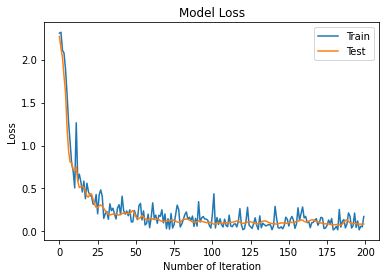

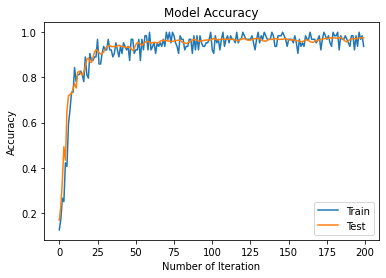

In [ ]:
#model 1
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

m1_conv1 = tf.layers.conv2d(inputs=input_x,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu,name='layer_conv1');
m1_pool1 = tf.layers.max_pooling2d(inputs=m1_conv1,pool_size=2,strides=2);
m1_conv2 = tf.layers.conv2d(inputs=m1_pool1,filters=36,kernel_size=5,padding="same",activation=tf.nn.relu,name='layer_conv2');
m1_pool2 = tf.layers.max_pooling2d(inputs=m1_conv2,pool_size=2,strides=2);
m1_flat1 = tf.layers.flatten(m1_pool2);
m1_fc1 = tf.layers.dense(inputs=m1_flat1,units=128,activation=tf.nn.relu, name='layer_fc1');
m1_logits = tf.layers.dense(inputs=m1_fc1,units=num_classes,activation=None, name='layer_fc_out');

# Cross Entropy Loss
m1_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=m1_logits);
m1_loss = tf.reduce_mean(m1_cross_entropy);

# Accuracy
m1_softmax = tf.nn.softmax(logits=m1_logits);
m1_pred_op = tf.argmax(m1_softmax,dimension=1);
m1_acc_op = tf.reduce_mean(tf.cast(tf.equal(m1_pred_op, y_cls), tf.float32));

# Optimizer and Training Operation
m1_optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
m1_train_op = m1_optimizer.minimize(m1_loss);

session = tf.Session()
session.run(tf.global_variables_initializer())
train_batch_size = 64

num_iteration = 200
test_loss_list1 = []
train_loss_list1 = []
test_acc_list1 = []
train_acc_list1 = []

for i in range(num_iteration):
    x_batch, y_true_batch = data.train.next_batch(train_batch_size)
    train_loss,train_acc,_ = session.run([m1_loss,m1_acc_op,m1_train_op], feed_dict={x: x_batch,y: y_true_batch})
    test_loss, test_acc = session.run([m1_loss,m1_acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    train_loss_list1.append(train_loss)
    test_acc_list1.append(test_acc)
    train_acc_list1.append(train_acc)
    if i % 20 == 0:
        # Calculate the accuracy on the training-set.
        msg = "Iteration: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}"
        print(msg.format(i + 1, train_loss, train_acc))



#result visualization
plt.plot(np.arange(0,num_iteration),train_loss_list1)
plt.plot(np.arange(0,num_iteration),test_loss_list1)
plt.legend(['Train','Test'])
plt.xlabel('Number of Iteration')
plt.ylabel('Loss');
plt.title("Model Loss")
plt.show()

plt.plot(np.arange(0,num_iteration),train_acc_list1)
plt.plot(np.arange(0,num_iteration),test_acc_list1)
plt.legend(['Train','Test'])
plt.xlabel('Number of Iteration')
plt.ylabel('Accuracy');
plt.title("Model Accuracy")
plt.show()


In [ ]:
# model 2:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

model2_conv1 = tf.layers.conv2d(inputs=input_x,filters=4,kernel_size=5,padding="same",activation=tf.nn.relu,name='layer_conv1');
model2_pool1 = tf.layers.max_pooling2d(inputs=model2_conv1,pool_size=2,strides=2);

model2_conv2 = tf.layers.conv2d(inputs=model2_pool1,filters=12,kernel_size=5,padding="same",activation=tf.nn.relu,name='layer_conv2');
model2_pool2 = tf.layers.max_pooling2d(inputs=model2_conv2,pool_size=2,strides=2);

model2_flat1 = tf.layers.flatten(model2_pool2);
model2_fc1 = tf.layers.dense(inputs=model2_flat1,units=128,activation=tf.nn.relu, name='layer_fc1');
model2_logits = tf.layers.dense(inputs=model2_fc1,units=num_classes,activation=None, name='layer_fc_out');

# Cross Entropy Loss
model2_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=model2_logits);
model2_loss = tf.reduce_mean(model2_cross_entropy);

# Accuracy
model2_softmax = tf.nn.softmax(logits=model2_logits);
model2_pred_op = tf.argmax(model2_softmax,dimension=1);
model2_acc_op = tf.reduce_mean(tf.cast(tf.equal(model2_pred_op, y_cls), tf.float32));

# Optimizer and Training Operation  
model2_optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
model2_train_op = model2_optimizer.minimize(model2_loss);

session = tf.Session()
session.run(tf.global_variables_initializer())
train_batch_size = 64

num_iteration = 200
test_loss_list2 = []
train_loss_list2 = []
test_acc_list2 = []
train_acc_list2 = []

for i in range(num_iteration):
    x_batch, y_true_batch = data.train.next_batch(train_batch_size)
    train_loss,train_acc,_ = session.run([model2_loss,model2_acc_op,model2_train_op], feed_dict={x: x_batch,y: y_true_batch})
    test_loss, test_acc = session.run([model2_loss,model2_acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    
    train_loss_list2.append(train_loss)
    train_acc_list2.append(train_acc)
    test_loss_list2.append(test_loss)
    test_acc_list2.append(test_acc)

    if i % 20 == 0:
        # Calculate the accuracy on the training-set.
        msg = "Iteration: {0:>6}, Training Loss: {1:>1.6}, Training Accuracy: {2:>6.1%}"
        print(msg.format(i + 1, train_loss, train_acc))

Iteration:      1, Training Loss: 2.28052, Training Accuracy:   6.2%
Iteration:     21, Training Loss: 0.509551, Training Accuracy:  84.4%
Iteration:     41, Training Loss: 0.343933, Training Accuracy:  92.2%
Iteration:     61, Training Loss: 0.15337, Training Accuracy:  96.9%
Iteration:     81, Training Loss: 0.188396, Training Accuracy:  92.2%
Iteration:    101, Training Loss: 0.198869, Training Accuracy:  93.8%
Iteration:    121, Training Loss: 0.089215, Training Accuracy:  96.9%
Iteration:    141, Training Loss: 0.177552, Training Accuracy:  95.3%
Iteration:    161, Training Loss: 0.201982, Training Accuracy:  93.8%
Iteration:    181, Training Loss: 0.0982236, Training Accuracy:  95.3%


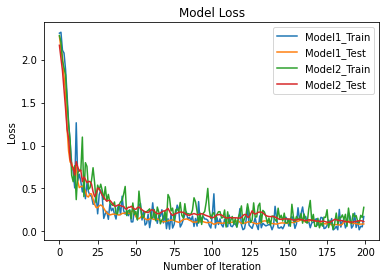

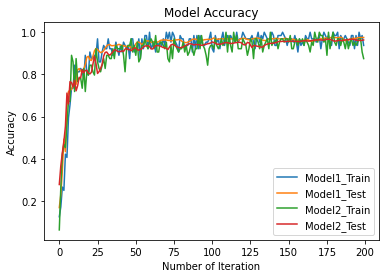

In [ ]:
#final result visualization
plt.plot(np.arange(0,num_iteration),train_loss_list1)
plt.plot(np.arange(0,num_iteration),test_loss_list1)
plt.plot(np.arange(0,num_iteration),train_loss_list2)
plt.plot(np.arange(0,num_iteration),test_loss_list2)
plt.legend(['Model1_Train','Model1_Test','Model2_Train','Model2_Test'])
plt.xlabel('Number of Iteration')
plt.ylabel('Loss');
plt.title("Model Loss")
plt.show()

plt.plot(np.arange(0,num_iteration),train_acc_list1)
plt.plot(np.arange(0,num_iteration),test_acc_list1)
plt.plot(np.arange(0,num_iteration),train_acc_list2)
plt.plot(np.arange(0,num_iteration),test_acc_list2)
plt.legend(['Model1_Train','Model1_Test','Model2_Train','Model2_Test'])
plt.xlabel('Number of Iteration')
plt.ylabel('Accuracy');
plt.title("Model Accuracy")
plt.show()
